#                   Quiz prétraitement des données
#                 Niveau : M2-TIUF
# Date : Mardi 28 Novembre 2023
# Durée : 1h00

# NOM :Rachidi
#Prénom : Abdelaziz

#  Importation des bibliotheques

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) Importer les jeu de donnees aug_train.csv et aug_test.csv qui se trouvent dans le dossier data partagé dans drive  sous forme de deux dataframe df1 et df2

In [86]:
df2='/content/drive/MyDrive/Module_Cloud _Data_ Engineering /LAB_28_11_2023/aug_test.csv'
df1='/content/drive/MyDrive/Module_Cloud _Data_ Engineering /LAB_28_11_2023/aug_train.csv'
# Charger les DataFrames
df1 = pd.read_csv(df1)
df2 = pd.read_csv(df2)


#  2) Quelle est la taille des deux bases de données

In [88]:
# Afficher la taille des DataFrames
print("Taille de df1 :", df1.shape)
print("Taille de df2 :", df2.shape)

Taille de df1 : (19158, 14)
Taille de df2 : (2129, 13)


# 3) Donner la commande python qui permet de donner le type des données de df1

In [89]:
#print(df2.dtypes)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# 4) Faire une étude statistique descriptive pour df1

### Valeurs numeriques

In [90]:

# Afficher des statistiques descriptives pour les colonnes numériques
descriptive_stats = df1.describe()

# Afficher les statistiques descriptives
descriptive_stats

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Valeurs categoriques

In [91]:
# Afficher des statistiques descriptives pour les colonnes catégoriques
categorical_stats = df1.describe(include='object')

# Afficher les statistiques descriptives pour les colonnes catégoriques
categorical_stats

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


# 5) Concatiner les deux bases de donnees  df1 et df2 (train et test) après avoir supprimé la variable target du dataframe df1

In [92]:
 #Supprimer la variable cible du DataFrame df1 (si elle existe)
if 'target' in df1.columns:
    df1 = df1.drop('target', axis=1)

# Concaténer les deux DataFrames
dt = pd.concat([df1, df2], ignore_index=True)
dt

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
21283,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
21284,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
21285,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


# 6) Renseigner les valeurs manquantes pour chaque variable

In [93]:
# Calculer le décompte des valeurs manquantes pour chaque colonne
vm = dt.isnull().sum()
print(vm)

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
dtype: int64


# 7) Donner les valeurs manquantes en pourcentages

In [94]:
# Calculer le pourcentage de valeurs manquantes pour chaque variable
missing_percentages = (dt.isna().mean() * 100).round(2)

# Afficher les pourcentages de valeurs manquantes
print("Pourcentage de valeurs manquantes pour chaque variable:")
missing_percentages

Pourcentage de valeurs manquantes pour chaque variable:


enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    23.56
relevent_experience        0.00
enrolled_university        1.96
education_level            2.41
major_discipline          14.68
experience                 0.33
company_size              30.82
company_type              31.82
last_new_job               2.18
training_hours             0.00
dtype: float64

# 8) Faire des histogrammes pour les attributs numériques

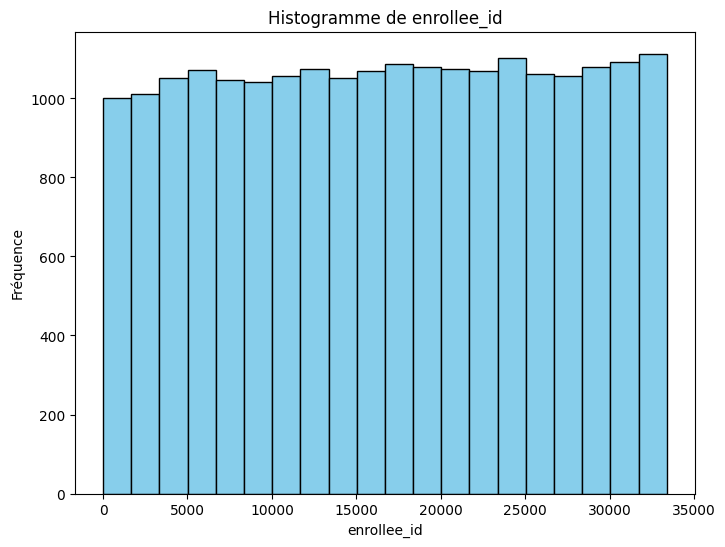

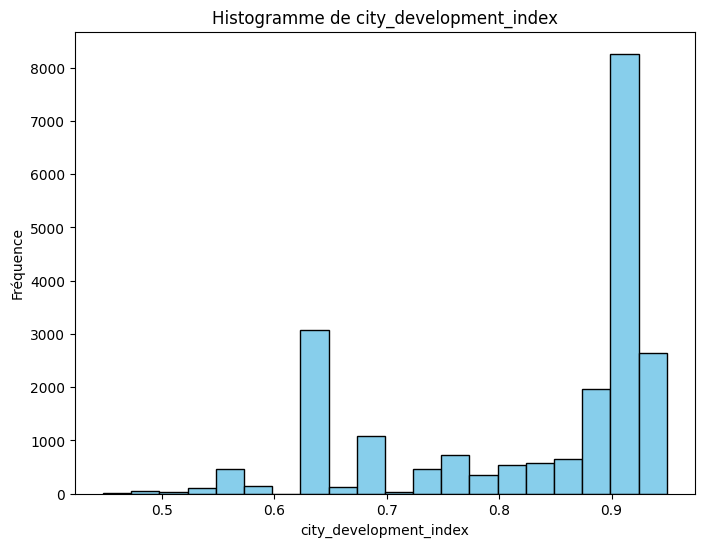

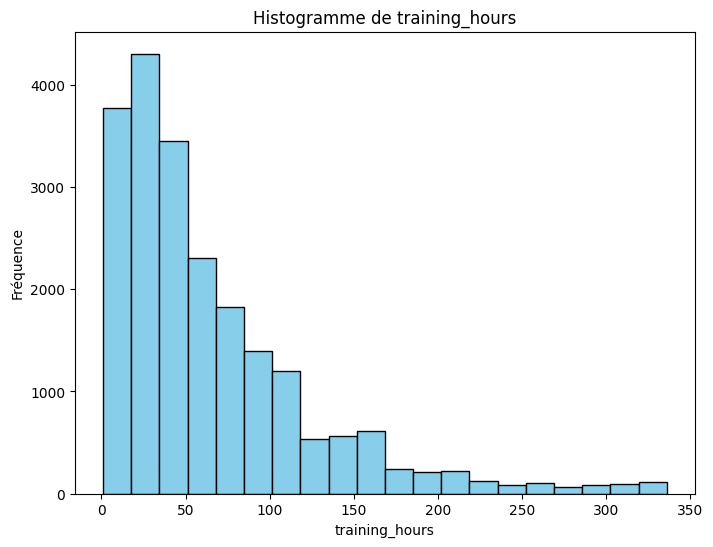

In [96]:
# Sélectionner les colonnes numériques
numeric_columns = dt.select_dtypes(include=['float64', 'int64']).columns

# Créer des histogrammes pour chaque colonne numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(dt[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

# 9) Remplacer les valeurs manquantes  numériques par la moyenne et les valuers manquantes catégoriues par les valeurs les plus fréquentes

In [97]:
# Remplacer les valeurs manquantes numériques par la moyenne
numeric_columns = dt.select_dtypes(include=['float64', 'int64']).columns
dt[numeric_columns] = dt[numeric_columns].fillna(dt[numeric_columns].mean())

# Remplacer les valeurs manquantes catégoriques par les valeurs les plus fréquentes
categorical_columns = dt.select_dtypes(include='object').columns
dt[categorical_columns] = dt[categorical_columns].fillna(dt[categorical_columns].mode().iloc[0])

# Afficher les premières lignes du DataFrame après le remplacement des valeurs manquantes
dt

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,50-99,Public Sector,4,15
21283,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,50-99,Pvt Ltd,2,30
21284,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,STEM,3,50-99,Pvt Ltd,never,18
21285,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,STEM,7,100-500,Public Sector,1,84


# 10) Vérifier que toutes les valeurs manquantes sont remplacées

In [98]:
# Recalculer le décompte des valeurs manquantes après le remplacement
missing_values_after_replace = dt.isnull().sum()

# Afficher le décompte des valeurs manquantes après le remplacement
print("Décompte des valeurs manquantes après le remplacement :")
print(missing_values_after_replace)


Décompte des valeurs manquantes après le remplacement :
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


#  11) Supprimer les attributs  'enrollee_id', city', gender' et  'major_discipline' car ils sont indépendantes de la valeurs cible

In [103]:
# Liste des colonnes à supprimer
columns_to_drop = ['enrollee_id', 'city', 'gender', 'major_discipline']

# Supprimer les colonnes indépendantes de la valeur cible
dt.drop(columns=columns_to_drop, inplace=True)


# 12) Transformer l'attribut 'relevent_experience' en valeur numerique comme suit :

 'No relevent experience'  en   0   
 'Has relevent experience' en   1


In [107]:
# Définir la correspondance entre les valeurs existantes et les nouvelles valeurs numériques
experience_mapping = {'No relevent experience': 0, 'Has relevent experience': 1}

# Appliquer la transformation à la colonne 'relevent_experience' dans le DataFrame dt
dt['relevent_experience'] = dt['relevent_experience'].replace(experience_mapping)


# 13) Transformer l'attribut 'enrolled_university' en valeur numerique comme suit :

 'no_enrollment'        en     0

 'Part time course'     en     1

 'Full time course'     en     2



In [108]:
# Définir la correspondance entre les valeurs existantes et les nouvelles valeurs numériques
university_mapping = {'no_enrollment': 0, 'Part time course': 1, 'Full time course': 2}

# Appliquer la transformation à la colonne 'enrolled_university'
dt['enrolled_university'] = dt['enrolled_university'].map(university_mapping)


# 14) Transformer l'attribut 'education_level' en valeur numerique comme suit :

 'Primary School' en 0

 'High School'    en 1

 'Graduate'       en 2

 'Masters'        en 3

 'Phd'            en 4

In [109]:
# Définir la correspondance entre les valeurs existantes et les nouvelles valeurs numériques
education_mapping = {
    'Primary School': 0,
    'High School': 1,
    'Graduate': 2,
    'Masters': 3,
    'Phd': 4
}

# Appliquer la transformation à la colonne 'education_level'
dt['education_level'] = dt['education_level'].map(education_mapping)


# 15) Transformer l'attribut 'experience' en valeur numeriques comme suit:

 experience  plus que 20 ans  :'>20' en 21
  
 experience moins que 1 an    :'<1'  en 0


In [110]:
# Définir la correspondance entre les valeurs existantes et les nouvelles valeurs numériques
experience_mapping = {
    '>20': 21,
    '<1': 0
}

# Appliquer la transformation à la colonne 'experience'
dt['experience'] = dt['experience'].map(experience_mapping)


# 16) Transformer l'attribut 'company_size' en valeur numerique comme suit :

 Taille de l'entreprise est        '<10'           en 0

 Taille de l'entreprise est'10/49'          en 1

 Taille de l'entreprise est'50-99'          en 2

 Taille de l'entreprise est'100-500'        en 3

 Taille de l'entreprise est'500-999'        en 4

 Taille de l'entreprise est'1000-4999'      en 5

 Taille de l'entreprise est'5000-9999'      en 6

 Taille de l'entreprise est '>10000'        en 7


In [111]:
# Définir la correspondance entre les valeurs existantes et les nouvelles valeurs numériques
company_size_mapping = {
    '<10': 0,
    '10/49': 1,
    '50-99': 2,
    '100-500': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '>10000': 7
}

# Appliquer la transformation à la colonne 'company_size'
dt['company_size'] = dt['company_size'].map(company_size_mapping)


# 17) Transformer l'attribut 'company_type' en valeur numeriques comme suit:

 Entreprise de type : Pvt Ltd               en 0

 Entreprise de type : Funded Startup               en 1

 Entreprise de type : Public Sector              en 2

 Entreprise de type : Early Stage Startup        en 3

Entreprise de type : NGO                        en 4

Entreprise de type : Other               en 5



In [112]:
# Définir la correspondance entre les valeurs existantes et les nouvelles valeurs numériques
company_type_mapping = {
    'Pvt Ltd': 0,
    'Funded Startup': 1,
    'Public Sector': 2,
    'Early Stage Startup': 3,
    'NGO': 4,
    'Other': 5
}

# Appliquer la transformation à la colonne 'company_type'
dt['company_type'] = dt['company_type'].map(company_type_mapping)


# 18) Transformer l'attribut 'last_new_job' en valeur numeriques comme suit:

Différence d’années entre l’emploi précédent et l’emploi actuel : 'Never'          en 0

Différence d’années entre l’emploi précédent et l’emploi actuel : '>4  '           en 5




In [113]:
# Définir la correspondance entre les valeurs existantes et les nouvelles valeurs numériques
last_new_job_mapping = {
    'Never': 0,
    '>4': 5
}

# Appliquer la transformation à la colonne 'last_new_job'
dt['last_new_job'] = dt['last_new_job'].map(last_new_job_mapping)


## 19) Traitenment des données NLP - Partie 1






# Appliquer tout le processus de prétraitement de données que l'on a vu ensemble sur le présent corpus

In [122]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd


# URL of the web page to extract text from

url = "https://www.justai.co/articles-de-blog/le-traitement-du-langage-naturel"  # Replace with the actual URL


# Fetching HTML content from the web page

response = requests.get(url)

html_content = response.content


# Create a BeautifulSoup object

soup = BeautifulSoup(html_content, 'html.parser')


# Remove HTML tags using regular expressions

cleaned_text = re.sub(r'<.*?>', '', soup.get_text())


print("Original HTML:")

print(html_content)

print("\nCleaned Text (without HTML tags):")

print(cleaned_text)

Original HTML:
b'<!DOCTYPE html><!-- Last Published: Thu Nov 23 2023 13:23:37 GMT+0000 (Coordinated Universal Time) --><html data-wf-domain="www.justai.co" data-wf-page="653a9a644af50cbff6f5da92" data-wf-site="641bb743362b214fdd14aca8" lang="fr"><head><meta charset="utf-8"/><title>Le NLP, d\xc3\xa9finition, applications et b\xc3\xa9n\xc3\xa9fices</title><meta content="Le Traitement du Langage Naturel (NLP) est une discipline avanc\xc3\xa9e de l&#x27;intelligence artificielle (IA) qui vise \xc3\xa0 permettre aux machines de comprendre, d&#x27;interpr\xc3\xa9ter et de traiter le langage humain de mani\xc3\xa8re automatique et intelligente. Aussi appel\xc3\xa9 &quot;Traitement automatique du langage naturel&quot; (TALN), le NLP est un domaine de recherche en constante \xc3\xa9volution, cherchant \xc3\xa0 \xc3\xa9tablir un pont entre les capacit\xc3\xa9s de communication humaine et les syst\xc3\xa8mes informatiques." name="description"/><meta content="Le NLP, d\xc3\xa9finition, application

# Appliquer tout le processus de prétraitement de données que l'on a vu ensemble

## 20) Traitenment des données NLP - Partie 2

Tokénisez et structurez le texte en ensemble de sentences e sequences de même longueur et construisez alors un nouveau dataframe propre.

In [127]:
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import requests
from bs4 import BeautifulSoup

# Tokenisation en phrases
phrases = sent_tokenize(texte)

# Structuration en ensembles de phrases de même longueur
taille_sequence = 5  # Longueur des séquences (à modifier selon vos besoins)
sequences = [phrases[i:i+taille_sequence] for i in range(0, len(phrases), taille_sequence)]

# Création d'un dataframe propre avec les séquences
data = {'Sequence': [' '.join(seq) for seq in sequences]}
df_propre = pd.DataFrame(data)

# Affichage des premières lignes du nouveau dataframe
print(df_propre.head())

                                            Sequence
0  Le NLP, définition, applications et bénéfices\...
1  NLP définition Le Traitement du Langage Nature...
2  Elles permettent de recevoir, classifier, dist...
3  Par exemple, ils peuvent être utilisés pour tr...
4  Les données extraites sont ensuite stockées da...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
